# Datasets

> Datasets

In [ ]:
#| default_exp data.datasets

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2
from nbdev.showdoc import *

In [ ]:
#| export
import pandas as pd
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch
from matplotlib import pyplot as plt
import torch.utils.data as data

/home/syl20/anaconda3/envs/nimrod/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#| export
class ImageDataset(Dataset):
    " Base class for image datasets providing visualization of (image, label) samples"

    def show(self,
        index:int # Index of the (image,label) sample to visualize
        ):
        X, y = self.__getitem__(index)
        plt.figure(figsize = (1, 1))
        plt.imshow(X.numpy().reshape(28,28),cmap='gray')
        plt.title(f"Label: {int(y)}")
        plt.show()

    def show_random(self, n=5):
        index = torch.randint(0,self.__len__, n)
        images = [img for img in x[:n]]
        plt.imshow(images.numpy().reshape(28,28),cmap='gray')
    
            

In [ ]:
#| export 

class MNISTDataset(ImageDataset):
    "MNIST digit dataset"

    def __init__(
        self,
        data_root:str='~/Data', # path where data is saved
        train = True, # train or test dataset
        transform:torchvision.transforms.transforms=torchvision.transforms.ToTensor() # data formatting
    ):

        super().__init__()

        self.ds = torchvision.datasets.MNIST(
            data_root,
            train = train,
            transform=transform, 
            download=True
        )

    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        x = self.ds[idx][0]
        y = self.ds[idx][1]
        return x, y
    
    def train_dev_split(self,
        ratio:float, # percentage of train/dev split,
        seed:int=42 # rand generator seed
    ):
        train_set_size = int(len(self.ds) * ratio)
        valid_set_size = len(self.ds) - train_set_size

        # split the train set into two
        seed = torch.Generator().manual_seed(seed)
        train_set, valid_set = data.random_split(self.ds, [train_set_size, valid_set_size], generator=seed)
        return train_set, valid_set



In [ ]:
#| hide
# Difference between dataset.data (int) and default float data
dds = torchvision.datasets.MNIST('~/Data', train=False, download=True, transform=torchvision.transforms.ToTensor())
print(dds[0][0].shape)
print(dds.data.shape)
print(dds.targets.shape)
print(dds[0][0].type())
print(dds.data[0][0].type())

torch.Size([1, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([10000])
torch.FloatTensor
torch.ByteTensor


Number of samples in the dataset: 10000
torch.Size([1, 28, 28]) 7
Shape of image: torch.Size([1, 28, 28]), corresponding digit: 7
types: torch.FloatTensor


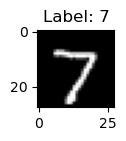

In [ ]:
ds = MNISTDataset('~/Data', train=False)
print(f"Number of samples in the dataset: {len(ds)}")
X,y = ds[0]
print(X.shape, y)
print(f"Shape of image: {X.shape}, corresponding digit: {int(y)}")
print(f"types: {X.type()}")
ds.show(0)

In [ ]:
ds = MNISTDataset('~/Data', train=True)
print(len(ds))
train, dev = ds.train_dev_split(0.8)
print(len(train), len(dev))

60000
48000 12000


In [ ]:
#| hide
dl = DataLoader(ds)
len(next(iter(dl)))
b = next(iter(dl))[0]
print(b.shape)
bb = b.view(b.size(0), -1)
print(bb.shape)
print(b.flatten().unsqueeze(0).shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 784])
torch.Size([1, 784])


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()